In [2]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l


def f(x):
    return 3 * x ** 2 - 4 * x

In [3]:
f(3)

15

In [4]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [5]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

In [6]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [7]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [8]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if `X` (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None: axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

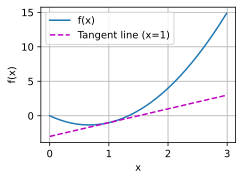

In [9]:
x = np.arange(0, 3, 0.01)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

EXERCISES

1. So far we took the rules for derivatives for granted. Using the definition and limits prove the properties for (i) $f(x) = c$, (ii) $f(x) =  x^n$, (iii) $f(x) = e^x$ and (iv) $f(x) = \log{x}$.

\begin{align*}
    f(x) = \lim_{h\to0} \frac{f(x+h) - f(x)}{h}
\end{align*}

2. In the same vein, prove the product, sum, and quotient rule from first principles.

3. Prove that the constant multiple rule follows as a special case of the product rule.

4. Calculate the derivative of $f(x) = x^x$.

5. What does it mean that $f'(x) = 0$ for some $x$? Give an example of a function $f$ and a location $x$
for which this might hold.

6. Plot the function  $f(x) = x^3 - \frac{1}{x}$ and plot its tangent line at $x = 1$.

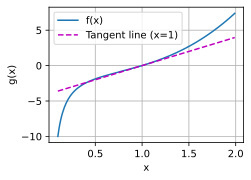

In [25]:
x = np.arange(0.1, 2, 0.01)
plot(x, [g(x), 4*x-4], 'x', 'g(x)', legend=['f(x)', 'Tangent line (x=1)'])

7 Find the gradient of the function $f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$.

\begin{align*}
    \nabla f = (6x_1,5e^{x_2})
\end{align*}


8. What is the gradient of the function $f(x) = ||\mathbf{x}||_2$? What happens for $\mathbf{x} = 0$?


\begin{align*}
    \nabla f = (\frac{x_i}{\sqrt{\sum_{i=1}^{n}x_i^2}}) ; \text{For $\mathbf{x} = 0$, the gradient is undefined}
\end{align*}


9. Can you write out the chain rule for the case where $u = f(x,y,z)$ and $x = x(a,b)$, $y = y(a,b)$, and $z = z(a,b)$?

\begin{align*}
    \nabla u = \frac{\partial u}{\partial x}(\frac{\partial x}{\partial a} + \frac{\partial x}{\partial b}) + \frac{\partial u}{\partial y}(\frac{\partial y}{\partial a} + \frac{\partial y}{\partial b}) + \frac{\partial u}{\partial z}(\frac{\partial z}{\partial a} + \frac{\partial z}{\partial b})
\end{align*}


10. Given a function $f(x)$ that is invertible, compute the derivative of its inverse $f^{-1}(x)$. Here we have that $f^{-1}(f(x)) = x$ and conversely $f(f^{-1}(x)) = x$. Hint: use these properties in your derivation.

\begin{align*}
    [f^{-1}(x)]' = \frac{1}{f'(f^{-1}(x))}
\end{align*}
